## Presentación

Estos ejercicios tienen el fin de poder evaluar la situación en la que se encuentra cada unx de ustedes a esta altura de la materia. No es un examen, ni llevará ningún tipo de nota.

Les pedimos que respeten al pie de la letra el nombre de las funciones que les damos para completar y su "signature". Esto es, que respeten los argumentos de entrada y la salida. Esto es porque tenemos una forma de verificación automática que de otra manera no funciona. Cuando hayamos recibido los notebooks, haremos público el código de control.

Por supuesto, si quieren agregar celdas y más código, si quieren hacer pruebas para asegurarse de que el código funciona, etc., pueden hacerlo aquí mismo.

La _modalidad de entrega preferencial_ es a través de GitHub:
1. Hacer un fork del [repositorio](https://github.com/exord/UNSAM_IA), tocando el botón de arriba a la derecha (ver figura). 

2. Crear un subdirectorio dentro del directorio <tt>entregas</tt> con el formato "ApellidoNombre"
3. Completar este notebook y colocarlo en ese directorio. Hacer un "commit" y un "push" a su versión del repositorio.
4. Realizar un <tt>pull request</tt> desde GitHub y seguir las instrucciones. Más información en la [página de GitHub](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/about-pull-requests).

De ser necesario, en caso de sufrir de **alergia severa a GitHub**, el notebook puede enviarse por email.

La **fecha límite** para la entrega es el **martes 21 de abril a las 20 horas**.

<figure>
    <img src="figures/fork_pullrequest.jpeg", alt="Fork", width="800px", 
         style="float: left; margin-right: 10px;"/>
    
     <figcaption>Fig.1 - Ubicación de los botones para Fork y Pull request en Github.</figcaption>
</figure>

## 1. Probabilidad Condicional

In [1]:
#Si estas en Google Colab, ejecuta esta celda una unica vez:
!mkdir datasets
!mkdir datasets/student-alcohol-consumption
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
!mv student-mat.csv datasets/student-alcohol-consumption/student-mat.csv

--2020-04-21 04:38:45--  https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [text/plain]
Saving to: ‘student-mat.csv’

student-mat.csv     100%[===================>]  41.00K  --.-KB/s    in 0.02s   

2020-04-21 04:38:46 (1.66 MB/s) - ‘student-mat.csv’ saved [41983/41983]



Similar al ***Caso: Apruebo si falto a clase?*** del [notebook de probabilidad condicional](02_Condicional.ipynb), calcule la probabilidad de que un alumno haya faltado menos de 3 veces dado que sacó más de un 60% en la materia, i.e.
$$
P( \text{absences} < 3 | \text{G3} \geq 12).
$$

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

In [0]:
import numpy as np
import pandas as pd

def prob_condicional(
    df=pd.read_csv('datasets/student-alcohol-consumption/student-mat.csv')):
    """Calcula P(absences < 3 | G3 >= 12).

    Input:
    df -- dataset de estudiantes

    Output:
    p        -- probabilidad de que absences > 3 dado que G3 >= 12
    """
    #Start

    # Necesito:
    # P(Faltas < 3 | Nota >= 12) = P(F<3 | N>=12)
    #
    # Por Bayes:
    # P(F<3, N>=12) = P(F<3)*P(N>=12 | F<3) = P(N>=12)*P(F<3 | N>=12)
    #
    # => P(F<3 | N>=12) = P(F<3, N>=12) / P(N>=12)

    N = df.shape[0]
    p_joint = df[ (df["absences"]<3) & (df["G3"]>=12) ].shape[0] / N        
    p_nota = df[ df["G3"]>=12 ].shape[0] / N

    #guarda el valor final, como un número, en esta variable
    resultado = (p_joint / p_nota)*100
    
    #Finish
    return resultado

In [3]:
prob_condicional()

50.0

In [62]:
df = pd.read_csv("./datasets/student-alcohol-consumption/student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [42]:
df = df[["G3", "absences"]]
df.head()

395


,G3,absences
0,6,6
1,6,4
2,10,10
3,15,2
4,10,4


In [63]:
p_nota = df[df["G3"]>=12].shape[0]
p_joint = df[ (df.G3>=12) & (df.absences<3)].shape[0]
print(p_joint/p_nota)

0.5


In [72]:
# este seria el resultado aplicando lo mismo al ejercicio de la notebook 02_Condicional
# da igual
N = df.shape[0]
p_nota = df[df["absences"]>=10].shape[0] / N
p_joint = df[ (df.G3*5>=80) & (df.absences>=10)].shape[0] / N
print(p_joint/p_nota*100)

6.024096385542169


## 2. Inferencia Bayesiana

Se tira una moneda N veces, de las cuales X sale cara. La moneda sale cara con una frecuencia $\mu$ desconocida, pero que se cree que es *fair*. 

Construya una función que recibe el vector con los N resultados (1: cara, 0: seca) y con él calcule tanto el posterior del parámetro $\mu$ como la probabilidad de que $\mu>0.7$. Use como prior una distribución normal con media 0.5 y desviación estandar 0.1 ($\mathcal{N}(0.5,0.1)$)

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: usar los métodos <tt>pdf</tt> y <tt>pmf</tt> de las clases de <tt>scipy.stats</tt> que se importan al principio de la celda. Revisar también los notebooks de [teoría](03_Inferencia.ipynb) y [práctica](03p_Inferencia_Soluciones.ipynb) que se presentaron en clase.

In [0]:
import numpy as np
from scipy.stats import binom, norm

def inferencia_moneda(tiradas, seed=123):
    """Realiza inferencia bayesiana en el parametro mu de una moneda.

    Input:
    tiradas -- Resultado de N tiradas
    seed    -- Semilla para np.random (default=123)

    Output:
    p        -- probabilidad de que mu>0.7
    posterior-- posterior de mu, shape=(100,)
    """
    np.random.seed(seed)
    mu, step = np.linspace(0, 1, num=100, retstep=True) #step es el espacio entre puntos

    #Numero de tiradas, y de veces que salio cara
    N=len(tiradas)
    X=np.sum(tiradas)

    #Start

    # Prior es una distribución normal con media 0.5 y desvio 0.1
    prior = norm.pdf(mu, 0.5, 0.1)

    # Likelihood binomial
    verosimilitud = binom.pmf(X, N, mu)

    # Posterior
    posterior = prior*verosimilitud

    # Evidencia, solo un factor de normalización para la posterior
    evidencia = posterior.sum() * step

    # Normalizo Posterior
    posterior = posterior/evidencia

    #prior = None #Esto es el prior evaluado en el vector mu
    #verosimilitud = None #La verosimilitud evaluada en el vector mu
    #posterior = prior*verosimilitud #el posterior no normalizado
    #evidencia = None #evidencia o verosimilitud marginalizada
    #posterior = posterior/evidencia #normalizamos para obtener el posterior

    p = posterior[mu>0.7].sum() * step
    #p = None #Probabilidad de que mu > 0.7 
    #Finish
    assert len(posterior) == len(mu), "Tamaño del posterior distinto al de mu"
    return p, np.array(posterior)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, bernoulli

(3.2205200618509057e-46, [<matplotlib.lines.Line2D at 0x7ffb95dd3b70>])

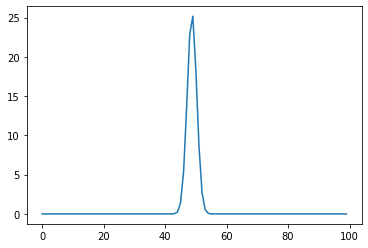

In [30]:
N = 1000
mu_true = 0.5
coin_tosses = bernoulli.rvs(mu_true, size=N)
p, posterior = inferencia_moneda(coin_tosses)
p, plt.plot(posterior)

Quiero saber como la joint probability de la cantidad de tiradas N y la cantidad de exitos X "pueden generar" la distribucion de probabilidad para el parametro mu (valor medio).

Si la moneda fuese fair, esperaria obtener una distribución de probabilidad tal que (N,X) -> 1/2 para todo (N,X)?

Si planteo lo que me interesa hallar, sería esto:

$$
P(\mu | (N,X))
$$

Por Bayes, yo se que:

$$
P(\mu, (N,X)) = P(\mu)*P((N,X) | \mu) = P(N,X) * P(\mu | (N,X))
$$

Entonces me queda:

$$
P(\mu | (N,X)) = P((N,X) | \mu) * P(\mu) * \frac{1}{P(N,X)}
$$

$$
Posterior = Likelihood * Prior * \frac{1}{Evidencia}
$$


Por lo tanto, para obtener el posterior de mu necesito hallar funciones de Likelihood, Prior y Evidencia. Prior: evidencia "previa" acerca de la distribución de probabilidad de mu. Likelihood: la probabilidad que nuestro mu se mapee en (N,X). Evidencia: esto seguro es para normalizar el mapeo mu->(N,X).

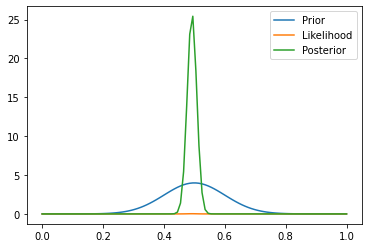

In [8]:
# sampleo N tiradas de moneda
N = 1000
mu_true = 0.5
#coin_tosses = np.random.randint(low=0, high=2, size=N)
#coin_tosses = np.random.normal(mu_true, 0.1, size=N)
coin_tosses = bernoulli.rvs(mu_true, size=N)

# cantidad de exitos
X = np.asarray([1 if toss>=0.5 else 0 for toss in coin_tosses])
X = np.sum(X)

# genero eje mu [0, 1] (no puede valer menos ni más que esto para la moneda)
mu_axis_steps = 100
mu_axis = np.linspace(0, 1, mu_axis_steps)

# Prior es una distribución normal con media 0.5 y desvio 0.1
prior = norm.pdf(mu_axis, 0.5, 0.1)

# Likelihood binomial
likelihood = binom.pmf(X, N, mu_axis)

# Posterior
posterior = likelihood * prior

# Evidencia, solo un factor de normalización para la posterior
evidencia = posterior.sum()/mu_axis_steps

# Normalizo Posterior
posterior = posterior/evidencia

plt.plot(mu_axis, prior, label="Prior")
plt.plot(mu_axis, likelihood, label="Likelihood")
plt.plot(mu_axis, posterior, label="Posterior")
plt.legend()

No handles with labels found to put in legend.


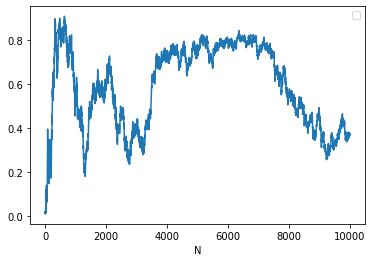

In [15]:
N = 10000
mu_true = 0.7
coin_tosses = bernoulli.rvs(mu_true, size=N)

mu_axis_steps = 100
mu_axis = np.linspace(0, 1, mu_axis_steps)
prior = norm.pdf(mu_axis, 0.5, 0.1)

mu_threshold = 0.7
prob = []
N_range = range(1, N)
for N in N_range:

    # numero de eventos que salio cara:
    X = coin_tosses[:N].sum()
    
    # Likelihood binomial
    likelihood = binom.pmf(X, N, mu_axis)

    # Posterior no normalizado
    posterior = likelihood * prior

    # Evidencia
    evidencia = posterior.sum()/mu_axis_steps

    # Posterior normalizado
    posterior = posterior/evidencia 
    
    # probabilidad de que p>p_threshold
    prob.append(posterior[mu_axis>mu_threshold].sum()/mu_axis_steps)

plt.plot(range(0,N),prob)
plt.xlabel("N")
plt.legend()
plt.show()

## 3. Regresión Lineal

Construye una función que dado un input (X_train, Y_train) realice un ajuste lineal de cuadrados mínimos, y con ello devuelva las predicciones para el input X_test como un vector Y_test.

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: pueden usar la implementación de las ecuaciones normales que aparece en el notebook de [modelos lineales](05_ModelosLineales.ipynb) o las clases del módulo <tt>sklearn.linear_model</tt>.

In [0]:
import numpy as np

def ajuste_lineal(X_train, Y_train, X_test):
    """Calcula un ajuste lineal.

    Input:
    X_train -- datos de entrenamiento, shape=(N,1)
    Y_train -- etiquetas de entrenamiento, shape=(N,1)
    X_test  -- datos de testeo, shape=(N_test,1)

    Output:
    Y_test  -- prediccion de etiquetas para X_test, shape=(N_test,1)
    """

    N=len(X_train)
    N_test=len(X_test)
    #Start
    
    # armo matriz de diseño
    column_1 = np.ones(shape=(X_train.shape[0], 1))
    column_2 = X_train
    phi = np.hstack((column_1, column_2))
  
    # resuelvo pesos
    A = np.dot(phi.T, phi)
    b = np.dot(phi.T, Y_train)
    weights = np.linalg.solve(A, b)

    #ahora guardamos los resultados en esta variable
    Y_test = weights[0] + X_test*weights[1]

    #Finish
    assert len(Y_test) == len(X_test), "Tamaño de Y_test distinto al de X_test"
    return np.array(Y_test)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

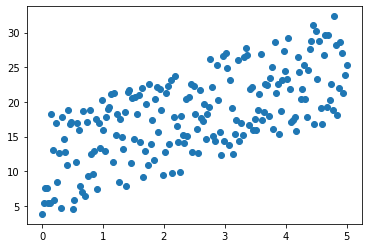

In [18]:
# datos de entrenamiento/testeo
n = 200
b = 3
m = 3
ruido = 15*np.random.rand(n, 1)
X = np.linspace(0, 5, n).reshape((n,1))
y = m*X + b + ruido

plt.scatter(X, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
X_train.shape

(160, 1)

In [20]:
# calculo y_test
from sklearn.metrics import mean_squared_error

y_test_pred = ajuste_lineal(X_train, y_train, X_test)
error_test = np.sqrt(np.sum((y_test_pred-y_test)**2)/X_test.shape[0])
error_test

4.439850724768909

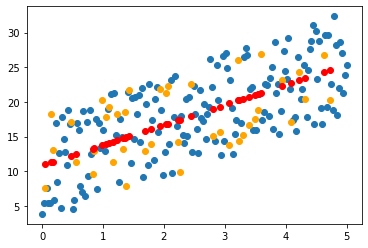

In [21]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c='orange')
plt.scatter(X_test, y_test_pred, c='r')